In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

pd.options.display.max_rows = 15

sns.set()

In [18]:
original_data = pd.read_csv("data/spooky-authors/train.zip", index_col=['id'])
original_data

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL
id22965,"A youth passed in solitude, my best years spen...",MWS
id09674,"The astronomer, perhaps, at this point, took r...",EAP
...,...,...
id03325,But these and other difficulties attending res...,EAP


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

In [15]:
pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', LinearSVC())
])

result = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3)


print(result)
print(result.mean())

[ 0.78783701  0.79635305  0.79509579]
0.793095281529


In [17]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', LogisticRegression())
])

result = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3)
result_log_loss = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3, 
                                  scoring='neg_log_loss')

print(result)
print(result.mean())

print(result_log_loss)
print(result_log_loss.mean())

[ 0.81449142  0.81673307  0.81348659]
0.814903693112
[-0.4767833  -0.47558918 -0.47131329]
-0.474561923192


In [25]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('svc', SVC(degree=2))
])

result = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3)                             scoring='neg_log_loss')

print(result)
print(result.mean())

[ 0.77251838  0.7744407   0.77716475]
0.774707944018


In [30]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

result = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3)
result_log_loss = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3, 
                                  scoring='neg_log_loss')
print(result)
print(result.mean())

print(result_log_loss)
print(result_log_loss.mean())

[ 0.77251838  0.7744407   0.77716475]
0.774707944018


In [47]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss

def random_search():
    params = {
        "clf__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.3],
        "features__ngram_range": [(1,1), (1,2), (1,3)],
        "features__analyzer": ['word'],
        "features__max_df":[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3],
        "features__min_df":[2, 3, 5, 10, 20],
        "features__lowercase": [False, True]
    }

    pipeline = Pipeline([
        ('features', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])

    random_search = RandomizedSearchCV(pipeline, param_distributions=params, 
                                       scoring='neg_log_loss',
                                       n_iter=30, cv=3, n_jobs=8)

    random_search.fit(original_data.text, original_data.author)
    report(random_search.cv_results_)
    
# random_search()  # -0.410

Model with rank: 1
Mean validation score: -0.410 (std: 0.002)
Parameters: {'features__ngram_range': (1, 3), 'features__min_df': 2, 'features__max_df': 0.5, 'features__lowercase': False, 'features__analyzer': 'word', 'clf__alpha': 0.05}

Model with rank: 2
Mean validation score: -0.420 (std: 0.003)
Parameters: {'features__ngram_range': (1, 2), 'features__min_df': 2, 'features__max_df': 0.4, 'features__lowercase': True, 'features__analyzer': 'word', 'clf__alpha': 0.1}

Model with rank: 3
Mean validation score: -0.424 (std: 0.003)
Parameters: {'features__ngram_range': (1, 2), 'features__min_df': 2, 'features__max_df': 1.0, 'features__lowercase': True, 'features__analyzer': 'word', 'clf__alpha': 0.01}

Model with rank: 4
Mean validation score: -0.430 (std: 0.006)
Parameters: {'features__ngram_range': (1, 3), 'features__min_df': 3, 'features__max_df': 0.8, 'features__lowercase': True, 'features__analyzer': 'word', 'clf__alpha': 0.05}

Model with rank: 5
Mean validation score: -0.445 (std: 0

In [52]:
from sklearn.model_selection import GridSearchCV

def grid_search():
    params = {
        "clf__alpha": [0.005, 0.01, 0.05],
        "features__ngram_range": [(1,2), (1,3)],
        "features__max_df":[0.4, 0.3, 0.2],
        "features__min_df":[2],
        "features__lowercase": [False]
    }

    pipeline = Pipeline([
        ('features', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])

    grid_search = GridSearchCV(pipeline, params, scoring='neg_log_loss', cv=3, n_jobs=8)

    grid_search.fit(original_data.text, original_data.author)
    report(grid_search.cv_results_)
    
# grid_search()  # -0.406

Model with rank: 1
Mean validation score: -0.406 (std: 0.002)
Parameters: {'clf__alpha': 0.05, 'features__lowercase': False, 'features__max_df': 0.3, 'features__min_df': 2, 'features__ngram_range': (1, 2)}

Model with rank: 2
Mean validation score: -0.406 (std: 0.002)
Parameters: {'clf__alpha': 0.05, 'features__lowercase': False, 'features__max_df': 0.4, 'features__min_df': 2, 'features__ngram_range': (1, 2)}

Model with rank: 3
Mean validation score: -0.406 (std: 0.002)
Parameters: {'clf__alpha': 0.05, 'features__lowercase': False, 'features__max_df': 0.2, 'features__min_df': 2, 'features__ngram_range': (1, 2)}

Model with rank: 4
Mean validation score: -0.410 (std: 0.002)
Parameters: {'clf__alpha': 0.05, 'features__lowercase': False, 'features__max_df': 0.3, 'features__min_df': 2, 'features__ngram_range': (1, 3)}

Model with rank: 5
Mean validation score: -0.410 (std: 0.002)
Parameters: {'clf__alpha': 0.05, 'features__lowercase': False, 'features__max_df': 0.4, 'features__min_df': 2,

In [78]:
pipeline = Pipeline([
    ('features', TfidfVectorizer(lowercase=False, max_df=0.3, min_df=2, ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.05))
])

result          = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3)
result_log_loss = cross_val_score(pipeline, original_data.text, original_data.author, cv=3, n_jobs=3, 
                                  scoring='neg_log_loss')

print(result)
print(result.mean())

print(result_log_loss)
print(result_log_loss.mean())

[ 0.8393076   0.84186332  0.84015326]
0.840441390237
[-0.40882509 -0.40361933 -0.40480497]
-0.405749794283


In [79]:
pipeline.fit(original_data.text, original_data.author)
pipeline.score(original_data.text, original_data.author)

0.98666939067368098

In [59]:
test = pd.read_csv("data/spooky-authors/test.zip", index_col=['id'])
test

,text
id,
id02310,"Still, as I urged our leaving Ireland with suc..."
id24541,"If a fire wanted fanning, it could readily be ..."
id00134,And when they had broken down the frail door t...
id27757,While I was thinking how I should possibly man...
id04081,I am not sure to what limit his knowledge may ...
id27337,"""The thick and peculiar mist, or smoke, which ..."
id24265,"That which is not matter, is not at all unless..."
...,...
id07156,"Consoling myself with this reflection, I was m..."


In [80]:
test_predictions = pipeline.predict_proba(test.text)

In [81]:
test_predictions

array([[ 0.03663063,  0.00969218,  0.95367719],
       [ 0.92377063,  0.06992591,  0.00630346],
       [ 0.01520444,  0.97756796,  0.00722761],
       ..., 
       [ 0.91366229,  0.03782161,  0.04851609],
       [ 0.10400809,  0.01017695,  0.88581496],
       [ 0.41292266,  0.57647207,  0.01060527]])

In [82]:
print(pipeline.classes_)

['EAP' 'HPL' 'MWS']


In [83]:
submit_file = pd.DataFrame(test_predictions, columns=['EAP','HPL', 'MWS'], index=test.index)
submit_file.head(10)

,EAP,HPL,MWS
id,,,
id02310,0.036631,0.009692,0.953677
id24541,0.923771,0.069926,0.006303
id00134,0.015204,0.977568,0.007228
id27757,0.639041,0.355005,0.005954
id04081,0.644050,0.254883,0.101067
id27337,0.892524,0.105497,0.001979
id24265,0.927638,0.061213,0.011149
id25917,0.020385,0.057341,0.922274
id04951,0.986071,0.013710,0.000219


In [84]:
submit_file.to_csv("~/Desktop/submit_author_1-1.csv")

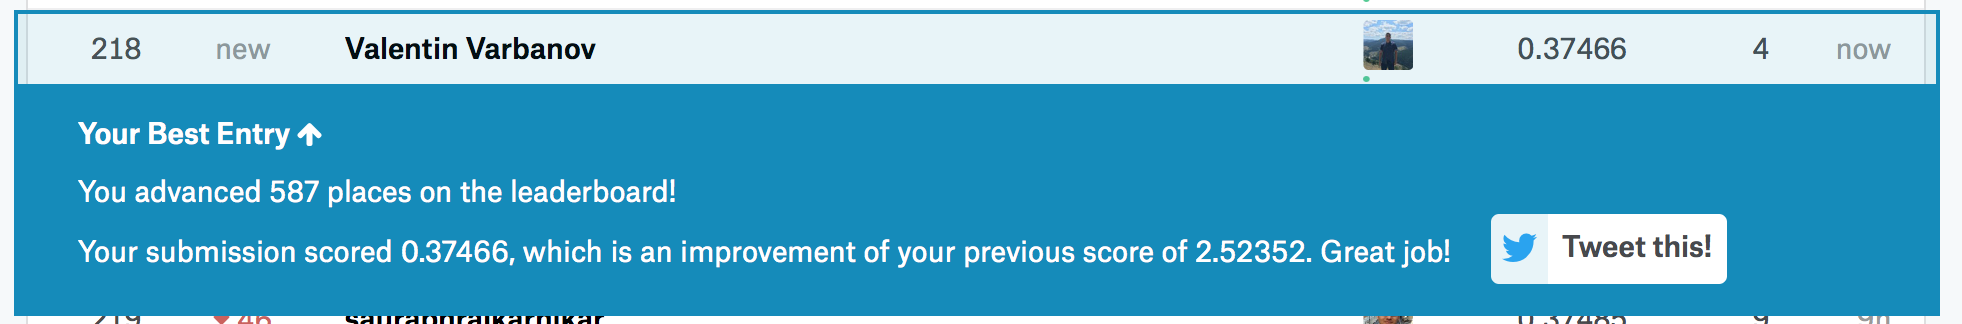

In [92]:
hacked_submit_file = submit_file.copy()

def hack_log_loss(value):
    if value > 0.85:
        return 1
    elif value < 0.15:
        return 0
    return value

hacked_submit_file['EAP'] = submit_file.apply(lambda row: hack_log_loss(row['EAP']), axis=1)
hacked_submit_file['HPL'] = submit_file.apply(lambda row: hack_log_loss(row['HPL']), axis=1)
hacked_submit_file['MWS'] = submit_file.apply(lambda row: hack_log_loss(row['MWS']), axis=1)

In [93]:
hacked_submit_file.head(10)

,EAP,HPL,MWS
id,,,
id02310,0.000000,0.000000,1.000000
id24541,1.000000,0.000000,0.000000
id00134,0.000000,1.000000,0.000000
id27757,0.639041,0.355005,0.000000
id04081,0.644050,0.254883,0.000000
id27337,1.000000,0.000000,0.000000
id24265,1.000000,0.000000,0.000000
id25917,0.000000,0.000000,1.000000
id04951,1.000000,0.000000,0.000000


In [91]:
hacked_submit_file.to_csv("~/Desktop/submit_author_2.csv")

In [94]:
hacked_submit_file = submit_file.copy()

def hack_log_loss(value):
    if value > 0.95:
        return 1
    elif value < 0.05:
        return 0
    return value

hacked_submit_file['EAP'] = submit_file.apply(lambda row: hack_log_loss(row['EAP']), axis=1)
hacked_submit_file['HPL'] = submit_file.apply(lambda row: hack_log_loss(row['HPL']), axis=1)
hacked_submit_file['MWS'] = submit_file.apply(lambda row: hack_log_loss(row['MWS']), axis=1)

In [95]:
hacked_submit_file.head(10)

,EAP,HPL,MWS
id,,,
id02310,0.000000,0.000000,1.000000
id24541,0.923771,0.069926,0.000000
id00134,0.000000,1.000000,0.000000
id27757,0.639041,0.355005,0.000000
id04081,0.644050,0.254883,0.101067
id27337,0.892524,0.105497,0.000000
id24265,0.927638,0.061213,0.000000
id25917,0.000000,0.057341,0.922274
id04951,1.000000,0.000000,0.000000


In [98]:
hacked_submit_file.to_csv("~/Desktop/submit_author_3.csv")